### First Look at stimuli for the experience

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import os

plt.rcParams["figure.figsize"] = (18,9)
plt.style.use('ggplot')

from matplotlib import patheffects

## Define All useful functions

In [2]:
def create_normal_distrib(mean,std,size,seed):
    rng = np.random.default_rng(seed)
    normal_distrib = rng.normal(loc=mean, scale=std, size=size)
    return(normal_distrib)


def create_draw_experiment(sample_to_draw,seed,size_sample=6,mean_factor=5,y=1000):
    rng = np.random.default_rng(seed)
    mean_small_sample_x = list(rng.choice(sample_to_draw,size = size_sample * mean_factor))
    small_sample_x = [0] * size_sample
    i = 0
    j = 0
    while j < size_sample:
        k=0
        while k < mean_factor:
            small_sample_x[j] = small_sample_x[j] + mean_small_sample_x[i]
            i+=1
            k+=1
        
        small_sample_x[j] = small_sample_x[j] / mean_factor
        j+=1
    small_sample_y = [y] * size_sample
    
    return(small_sample_x,small_sample_y)


def create_one_plot(sample_x,sample_y,x_line,y_line,xmin,xmax,ymin,ymax):
    figure, axis = plt.subplots(1,1,figsize = (20,3))    
    axis.set_xlim(xmin = xmin, xmax = xmax)
    axis.set_ylim(ymin = ymin, ymax = ymax)
    axis.get_yaxis().set_visible(False)
    axis.grid(False)
    
    for x_arrow in sample_x:
        axis.arrow(x = x_arrow,y=1500, dx = 0,dy = -500,width = 4,head_length = 150,length_includes_head = True)
    
    axis.errorbar(x_line,y_line, yerr = 75, alpha = 0.7)
    
    return(figure)
    

"""def create_plot_one_draw(i,j,sample_x,sample_y,x_line,y_line,xmin,xmax,ymin,ymax):
    
    axis[i,j].scatter(sample_x,sample_y,marker = "+",s = 0,color='blue')
    axis[i,j].set_xlim(xmin = xmin, xmax = xmax)
    axis[i,j].set_ylim(ymin = ymin, ymax = ymax)
    axis[i,j].get_yaxis().set_visible(False)
    axis[i,j].grid(False)
    for x_arrow in sample_x:
        axis[i,j].arrow(x = x_arrow,y=1500, dx = 0,dy = -500,width = 3,head_length = 125,length_includes_head = True)
    
    axis[i,j].errorbar(x_line,y_line, yerr = 75, alpha = 0.7)"""
    
    
def create_pairings(list_mean,list_std,list_npoints,n_iteration_per_condition,seed):

    res = np.empty((n_iteration_per_condition,len(list_npoints)+len(list_std)))
    rng = np.random.default_rng(seed)
    temp_list_mean = list_mean.copy()
    for i_iter in range(n_iteration_per_condition):
        i_res = 0
        for i_std in range(len(list_std)):
            for i_npoints in range(len(list_npoints)):
                i_mean = rng.choice(len(temp_list_mean))
                mean = temp_list_mean.pop(i_mean)
                res[i_iter,i_res] = mean
                i_res+=1
    return(res)


def create_one_plot_from_scratch(mean,std,size_sample,mean_factor,seed,x_line,y_line,xmin,xmax,ymin,ymax):
    
    sample = create_normal_distrib(mean=mean,std=std,size=10000,seed=seed)
    
    sample_x,sample_y = create_draw_experiment(sample_to_draw=sample,size_sample=size_sample,mean_factor=mean_factor,seed=seed)
    
    figure = create_one_plot(sample_x=sample_x,sample_y = sample_y,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
    
    return(figure)



def create_stimuli_experiment(start_mean = 1200,end_mean = 1800,list_std = [20,150],list_npoints = [2,7],n_iteration_per_condition = 2,n_samples = 10,mean_factor = 1,seed = 0,xmin = 1000,xmax = 2000,ymin = 800,ymax = 1500):
    """
    Final Function to call to save the figures on your computer
    """

    #Parameters
    small_std = list_std[0]
    big_std = list_std[1]
    small_size_sample = list_npoints[0]
    big_size_sample = list_npoints[1]

    n_conditions = (len(list_std) * len(list_npoints)) * n_iteration_per_condition

    list_mean = list(np.linspace(start_mean,end_mean,n_conditions))
    
    #Plotting 
    x_line = list(range(xmin,xmax+200,100))
    y_line = [1000] * len(x_line)

    dict_conditions = {0: "convergent_small_", 1:"convergent_large",2:"nonconvergent_small",3:"nonconvergent_large"}

    final_result = np.empty(shape = (4,n_iteration_per_condition,n_samples),dtype="object")

    for sample in range(n_samples):
        list_of_means = create_pairings(list_mean,list_std,list_npoints,n_iteration_per_condition,seed+sample)
        fig_list = np.empty((4,n_iteration_per_condition),dtype="object")
        for iteration in range(n_iteration_per_condition):     
            
            fig_list[0,iteration] = create_one_plot_from_scratch(mean=list_of_means[iteration][0],std=small_std,size_sample=small_size_sample,mean_factor=mean_factor,seed=seed+sample+iteration,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
            fig_list[1,iteration] = create_one_plot_from_scratch(mean=list_of_means[iteration][1],std=small_std,size_sample=big_size_sample,mean_factor=mean_factor,seed=seed+sample+iteration,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
            fig_list[2,iteration] = create_one_plot_from_scratch(mean=list_of_means[iteration][2],std=big_std,size_sample=small_size_sample,mean_factor=mean_factor,seed=seed+sample+iteration,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
            fig_list[3,iteration] = create_one_plot_from_scratch(mean=list_of_means[iteration][3],std=big_std,size_sample=big_size_sample,mean_factor=mean_factor,seed=seed+sample+iteration,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
        
            final_result[:,iteration,sample] = fig_list[:,iteration]

    for sample in range(n_samples):
        data_dir = os.path.join(os.getcwd(),f"sample_{sample+1}")
        try: os.mkdir(data_dir)

        except FileExistsError:
            pass

        for iteration in range(n_iteration_per_condition):

            for i_figure in range(len(final_result[:,iteration,sample])):
                figure = final_result[i_figure,iteration,sample]
                condition = dict_conditions[i_figure]
                figure.savefig(fname = f"{data_dir}\\{condition}_iteration{iteration+1}_sample{sample}.png",bbox_inches = "tight",pad_inches = 0,transparent = True)
       
    return(final_result)
            

    
                
        

## Create stimuli on your computer, within different folders

C:\Users\DIEU\AppData\Local\Temp/ipykernel_3688/1444211624.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, axis = plt.subplots(1,1,figsize = (20,3))


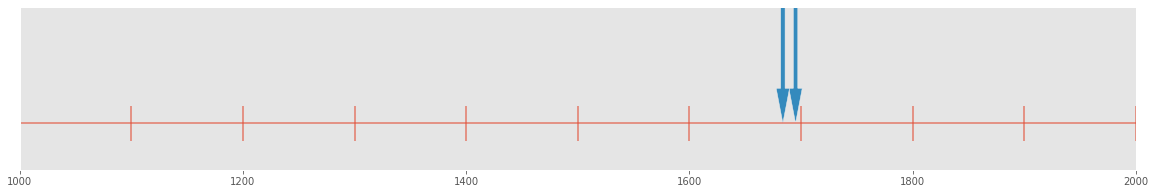

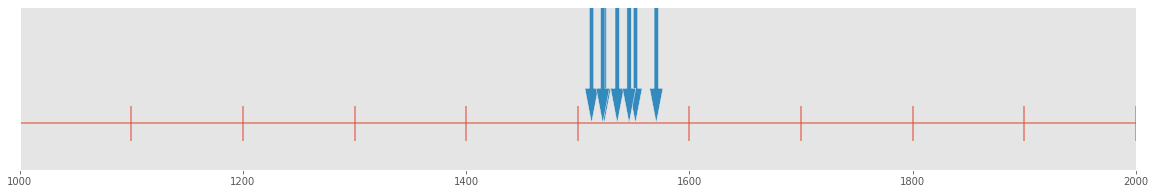

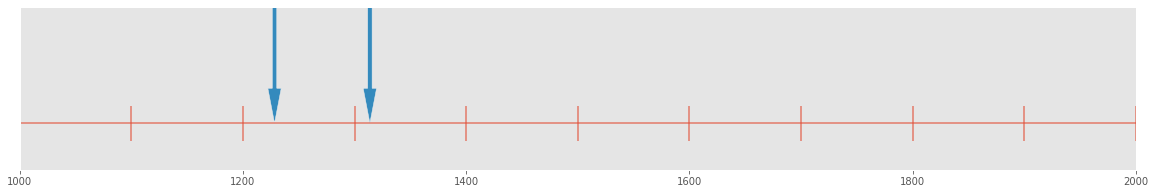

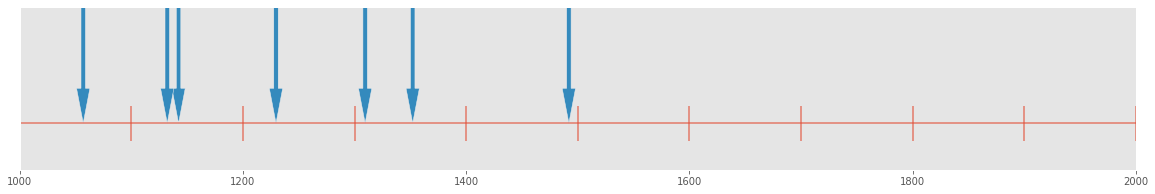

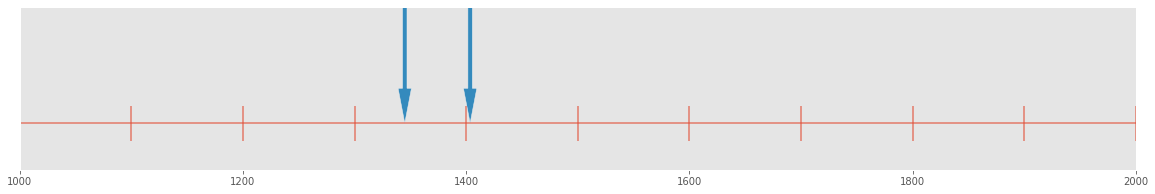

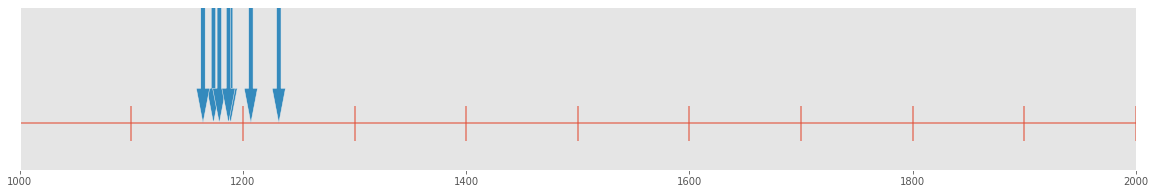

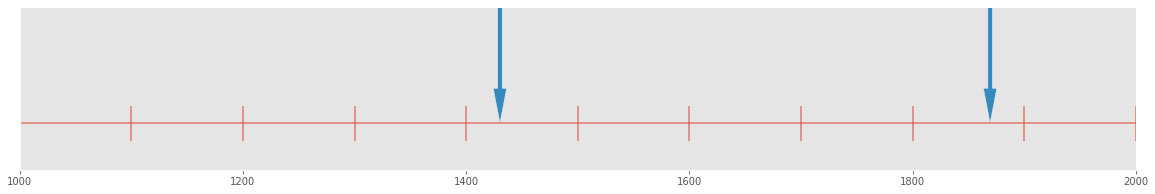

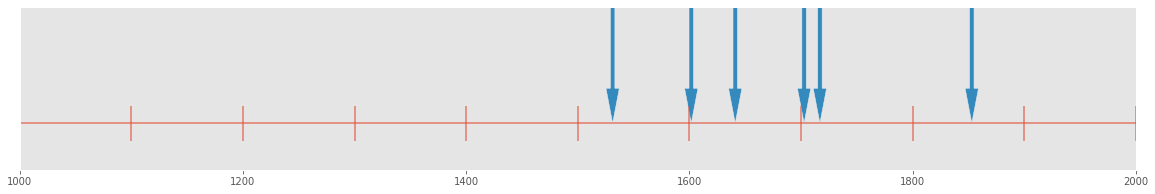

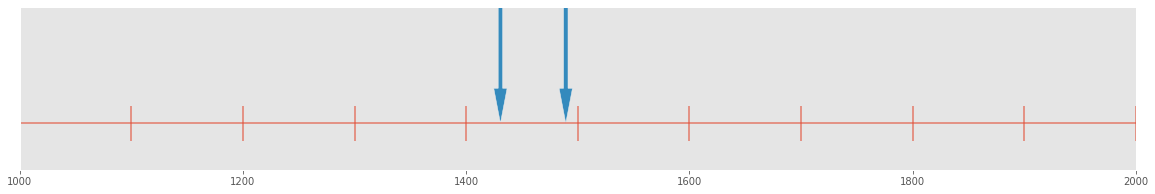

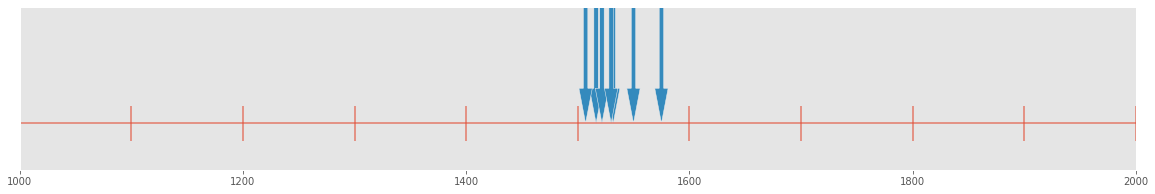

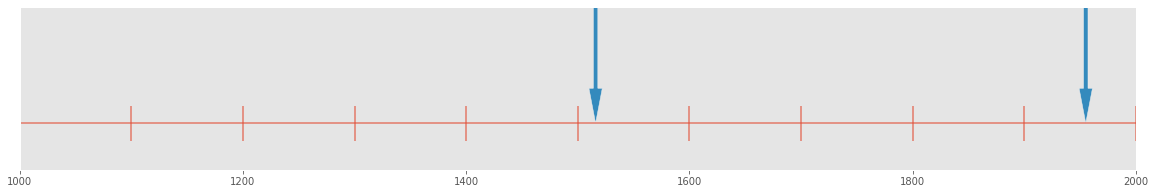

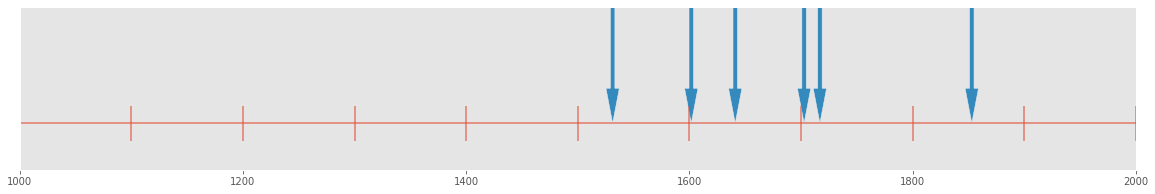

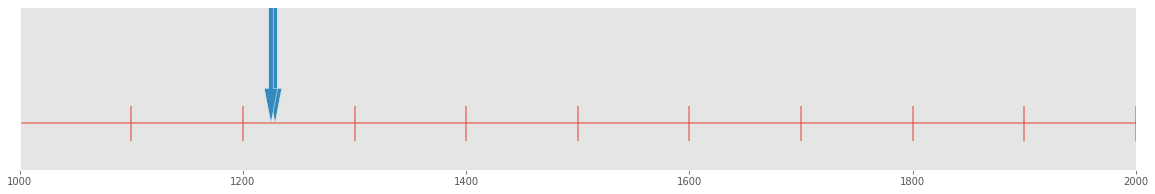

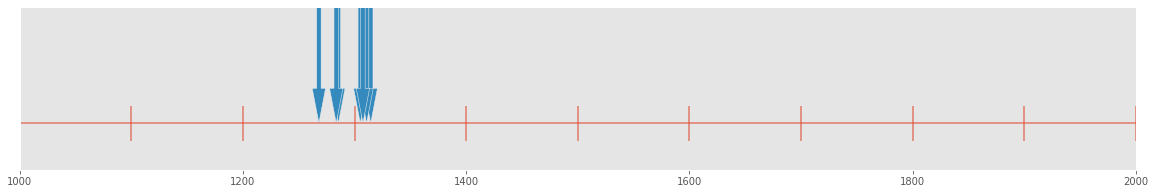

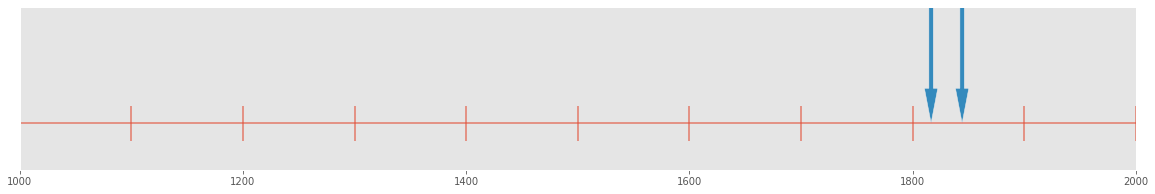

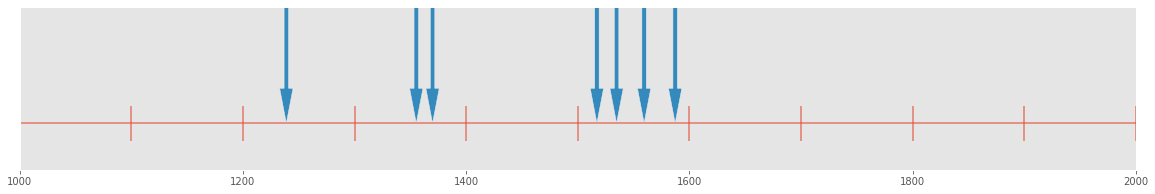

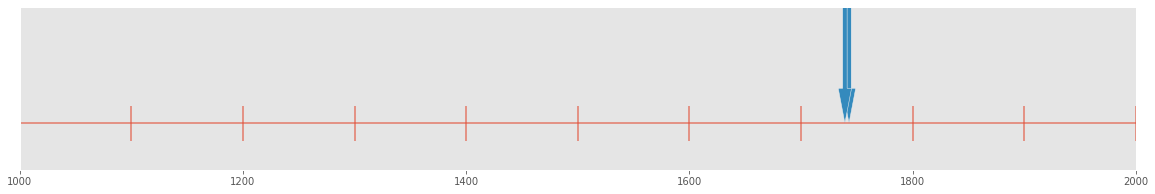

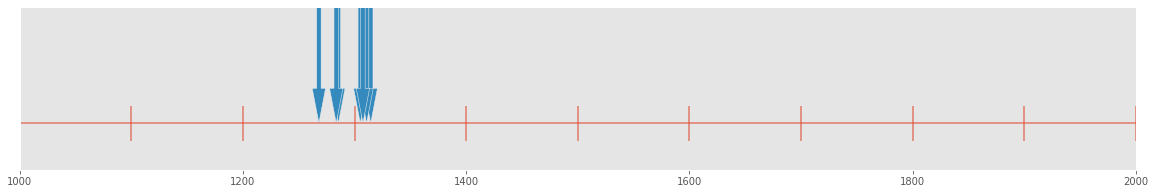

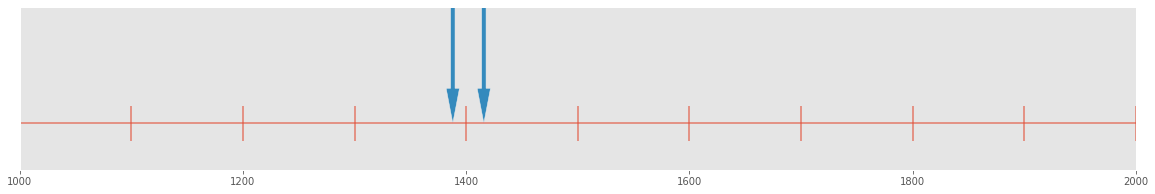

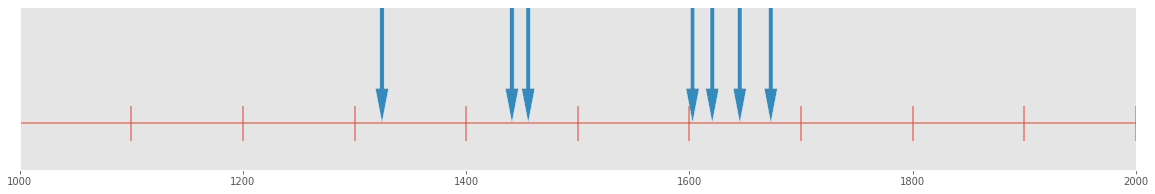

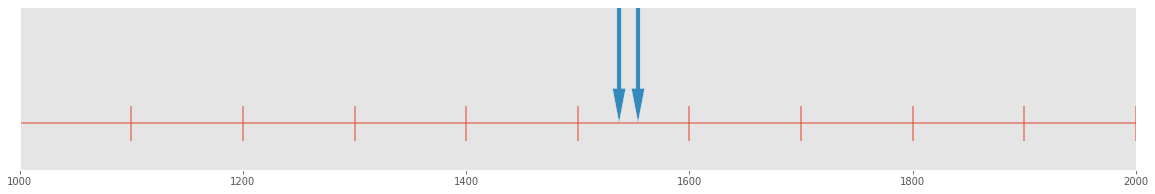

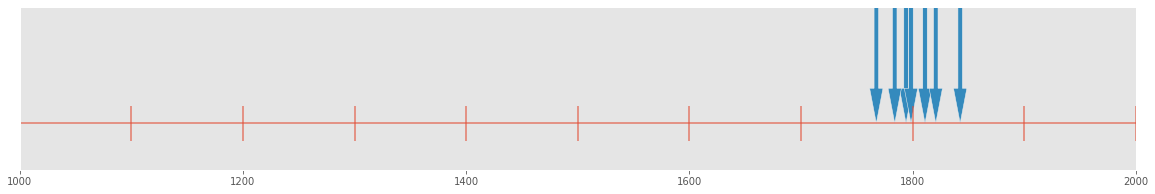

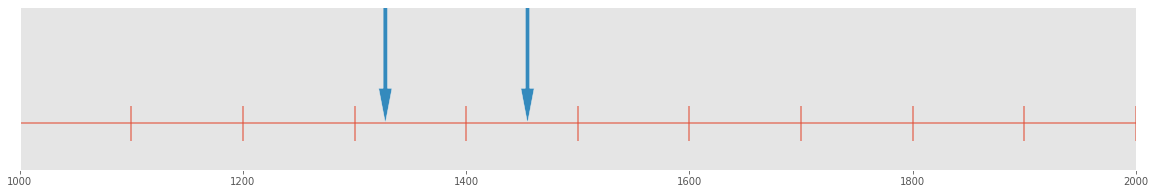

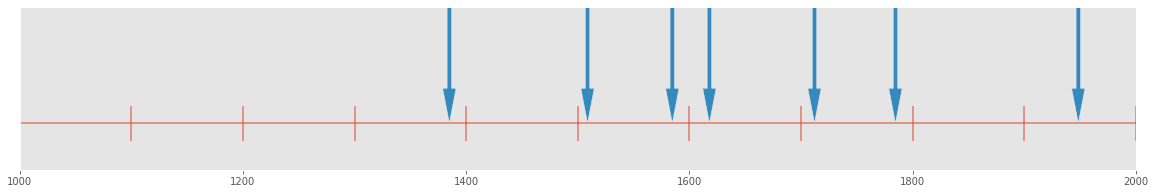

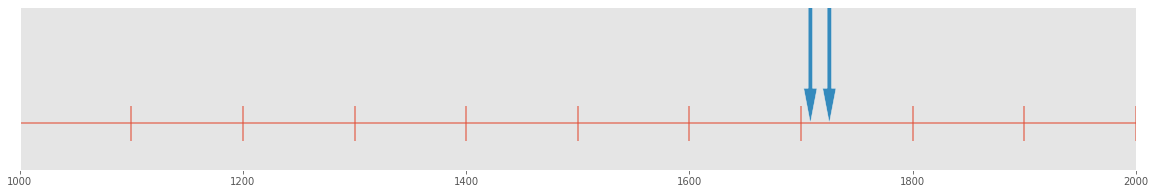

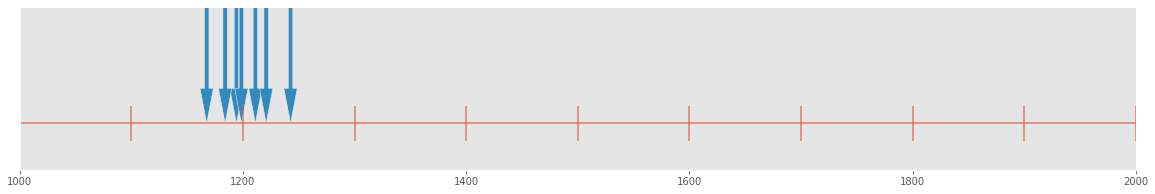

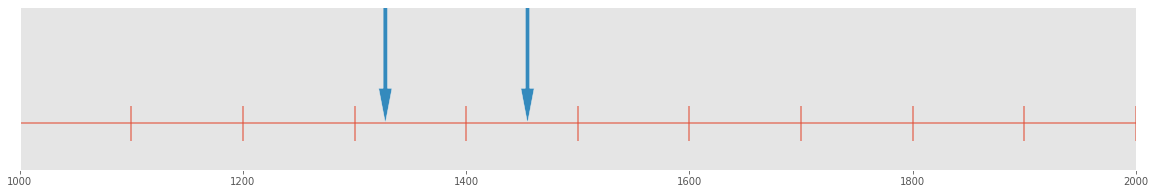

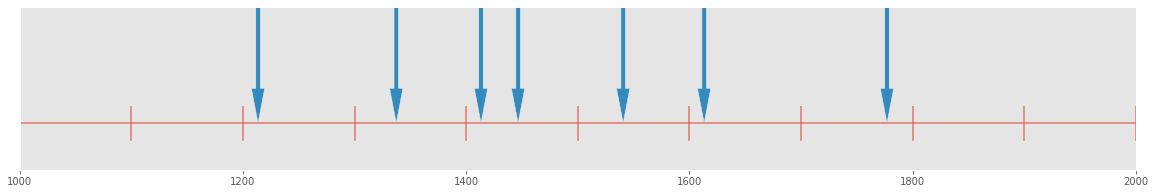

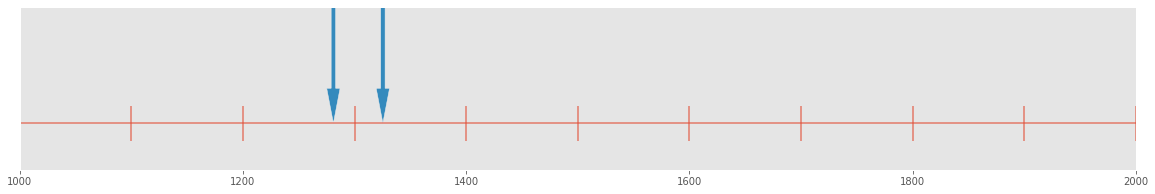

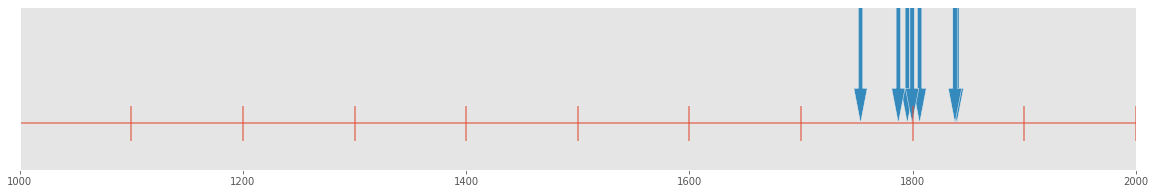

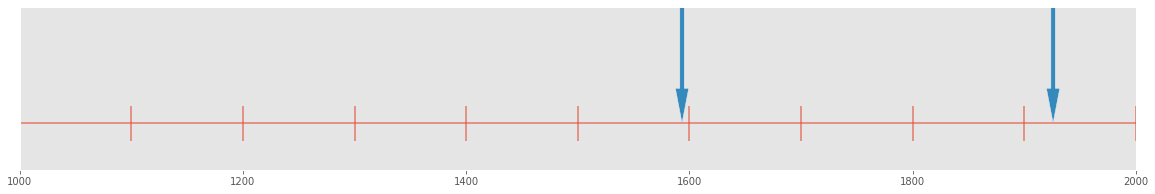

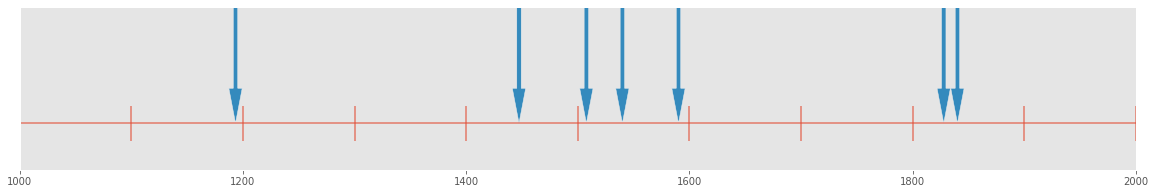

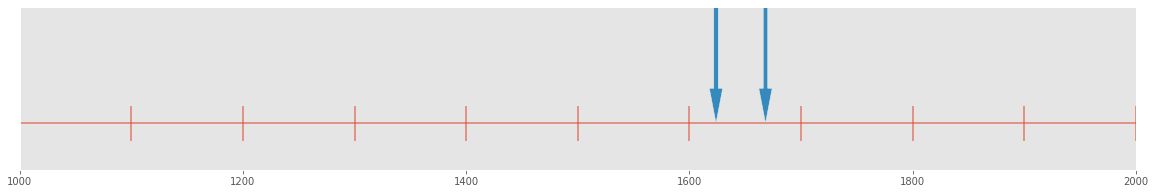

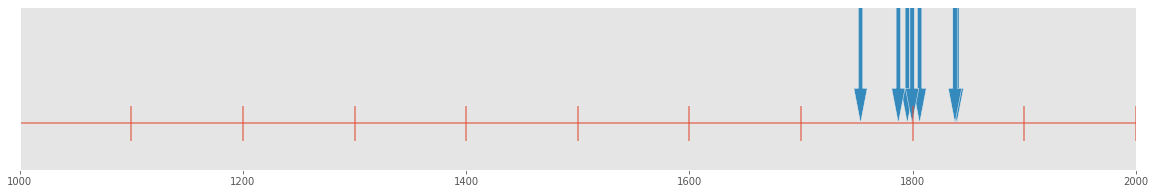

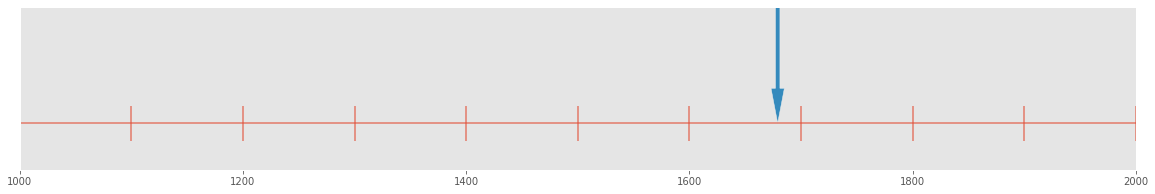

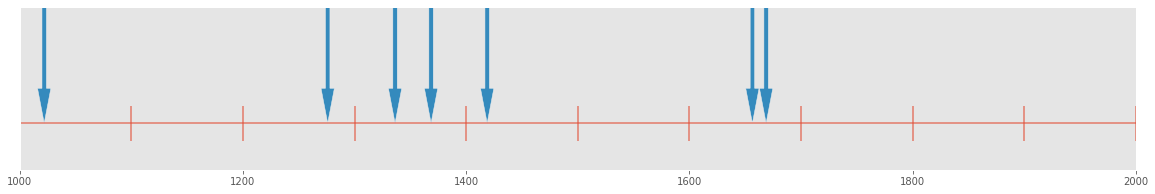

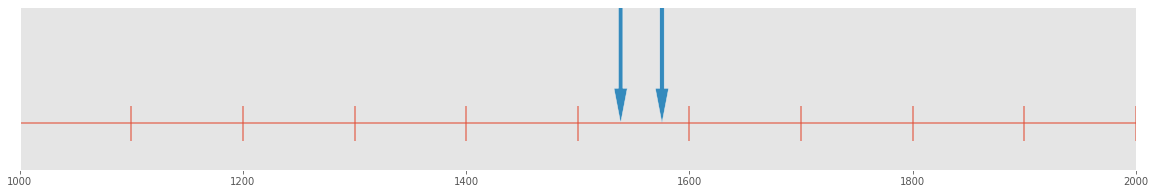

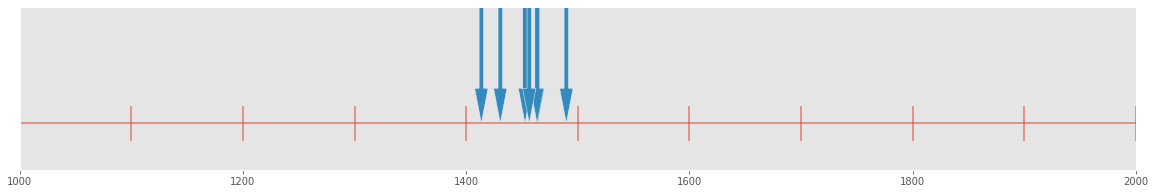

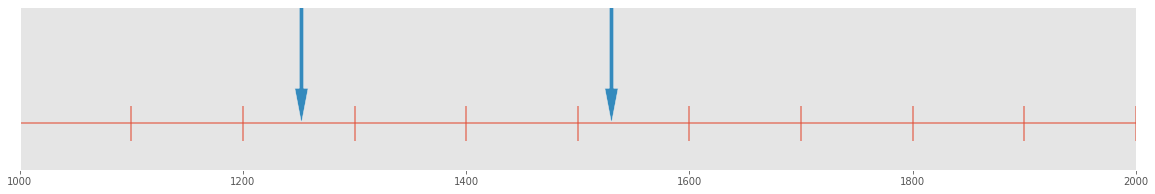

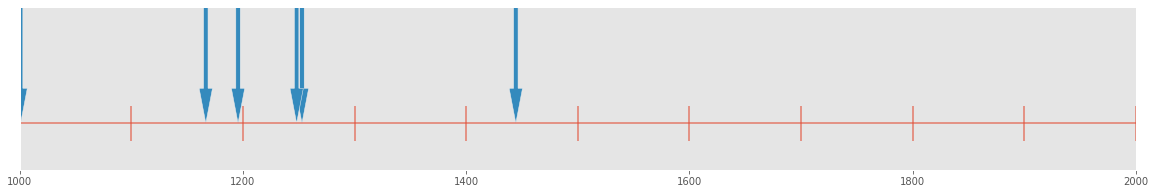

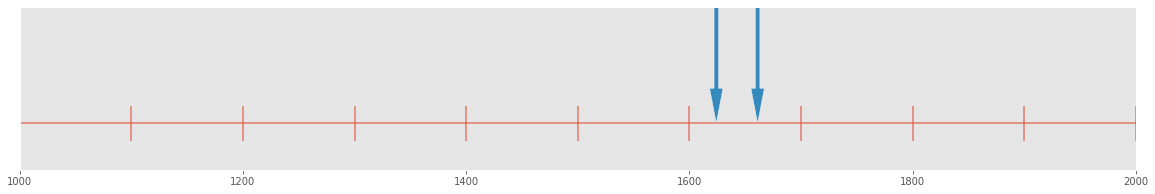

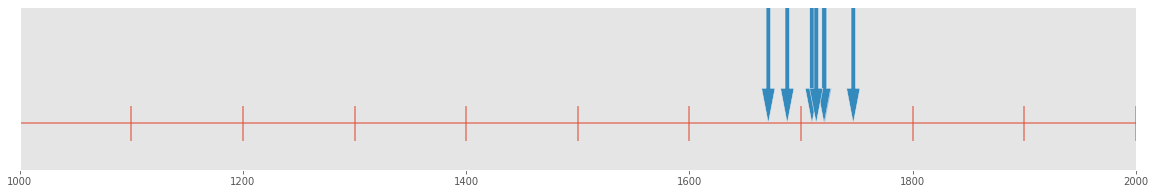

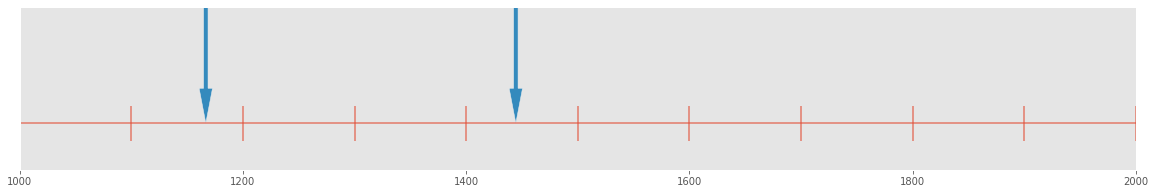

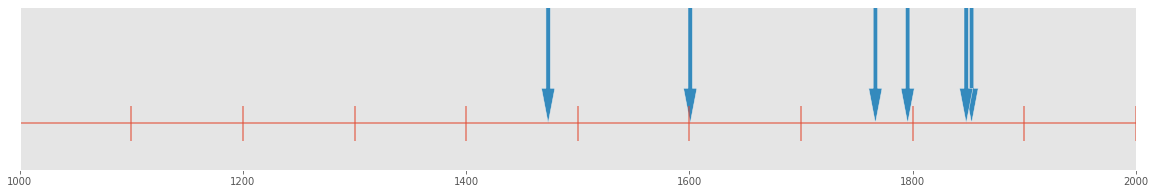

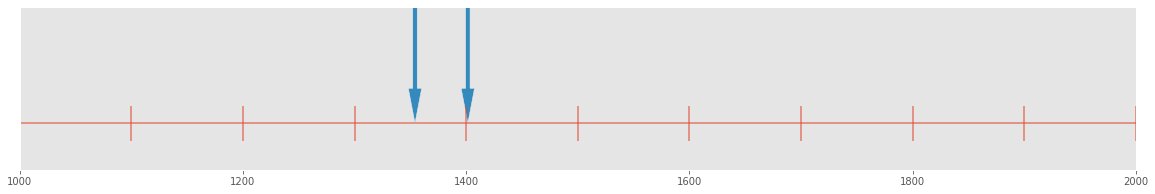

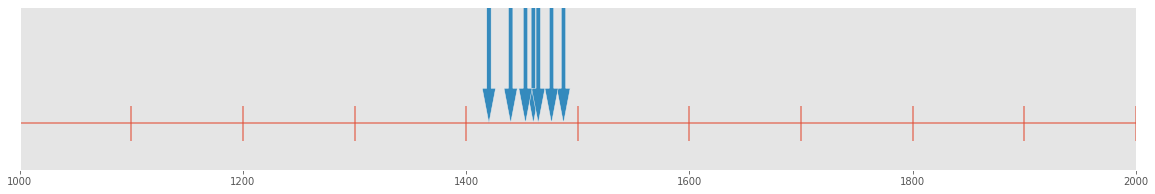

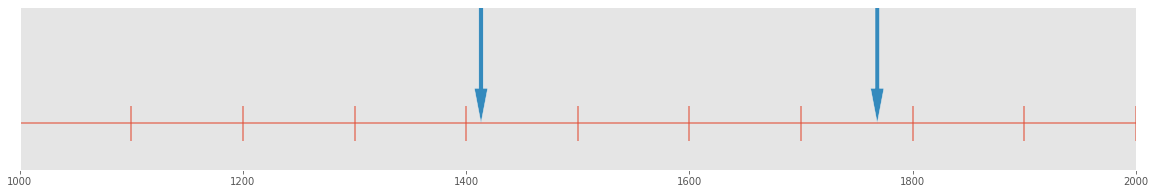

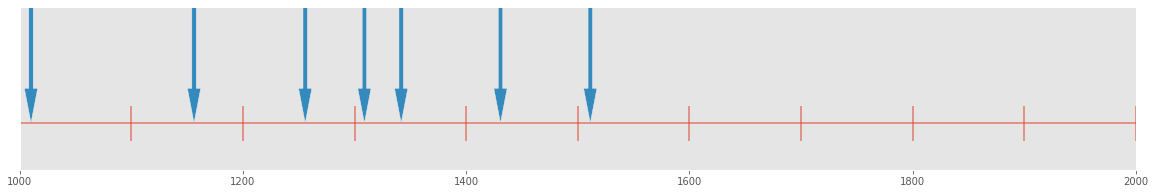

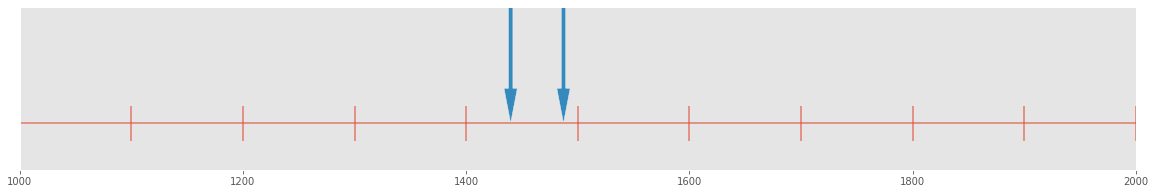

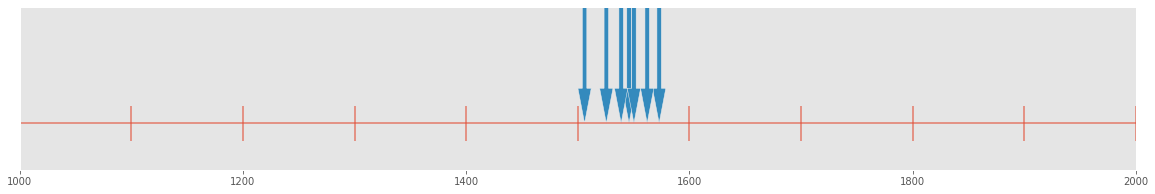

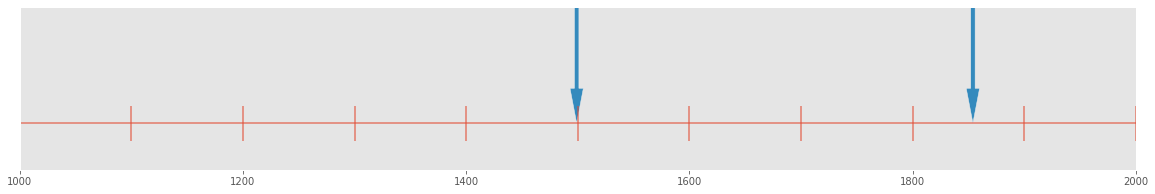

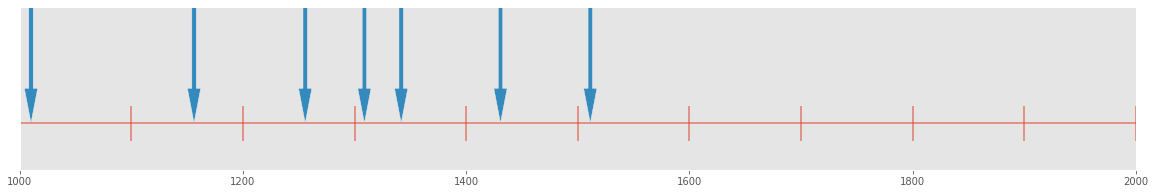

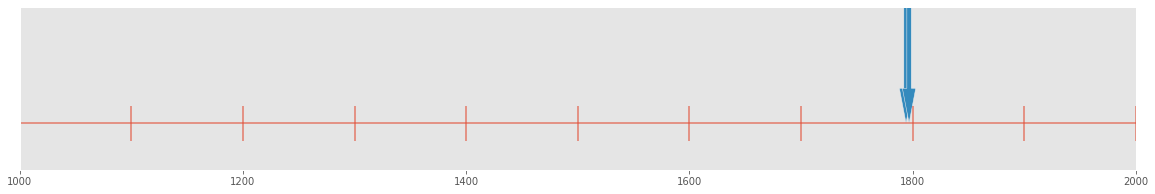

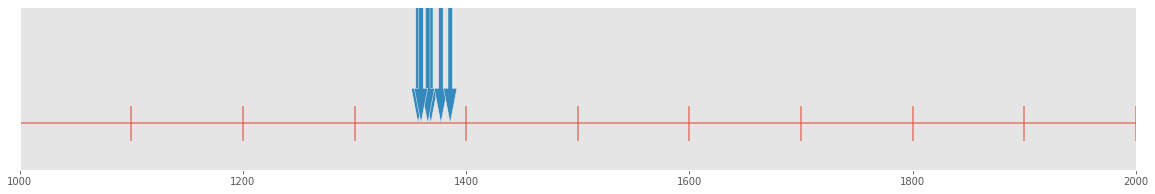

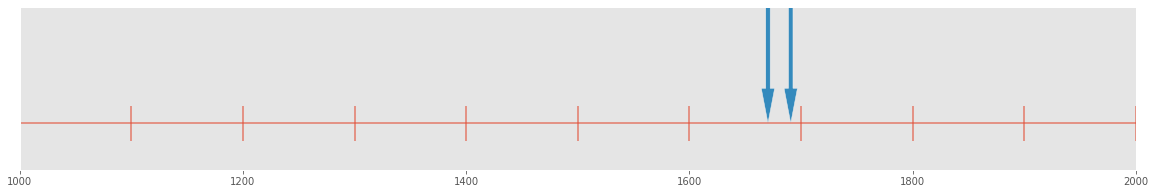

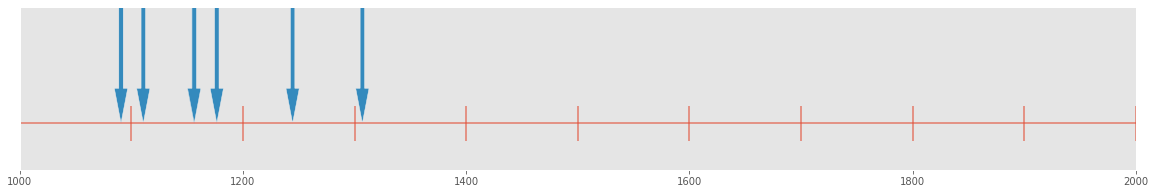

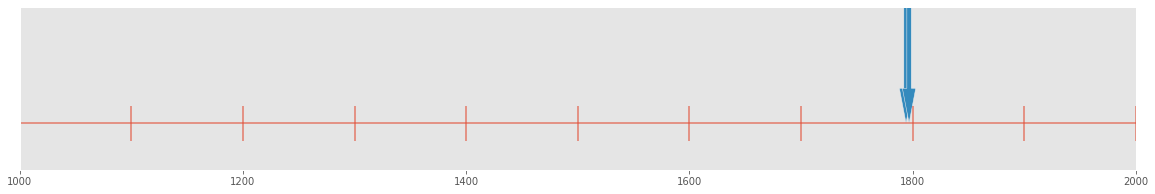

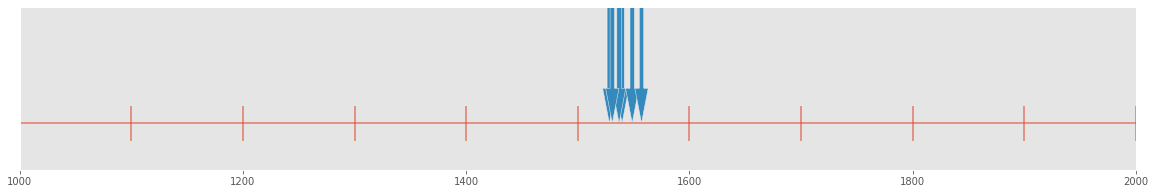

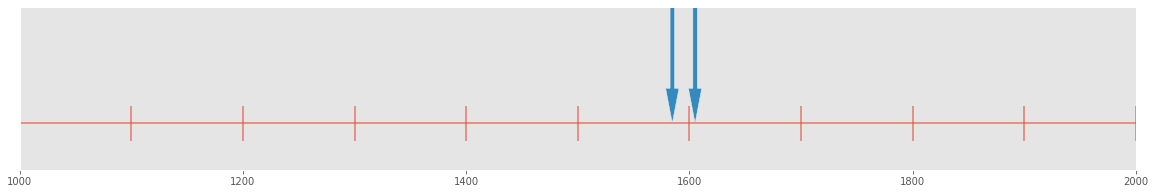

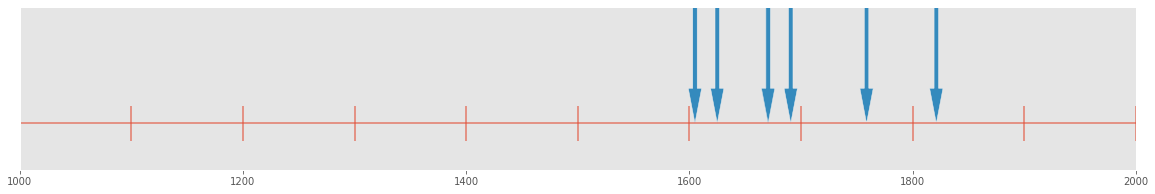

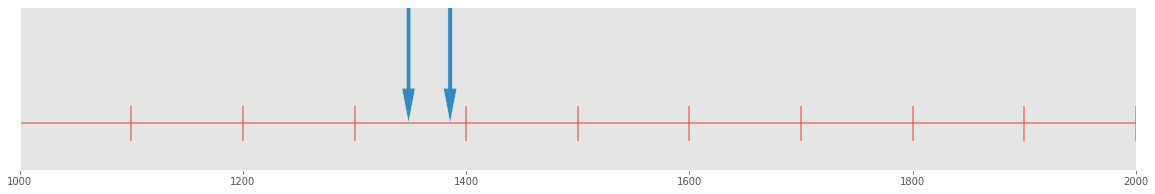

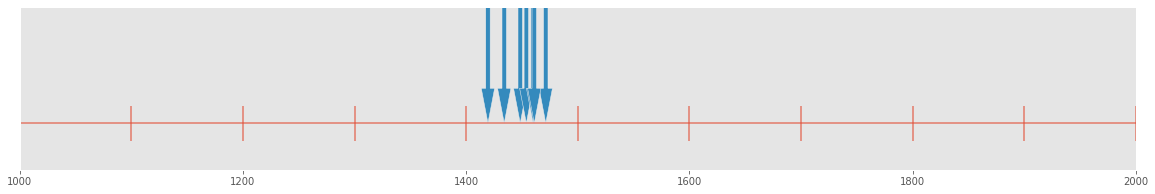

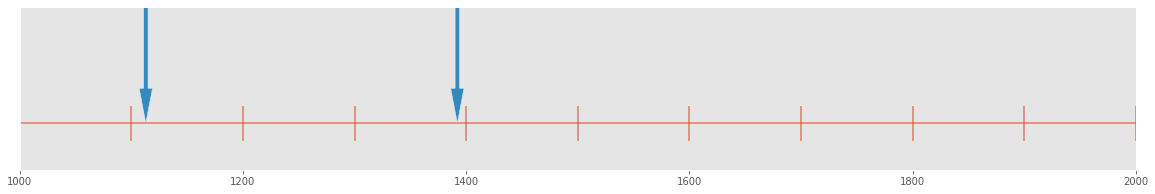

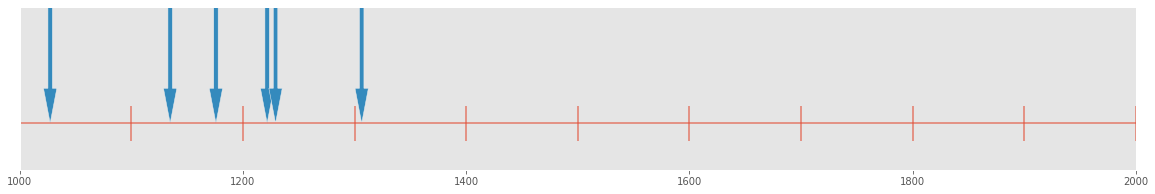

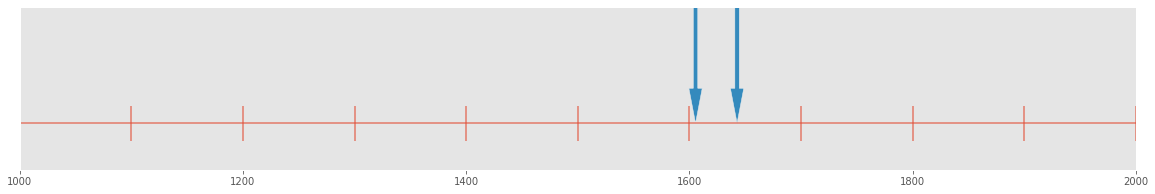

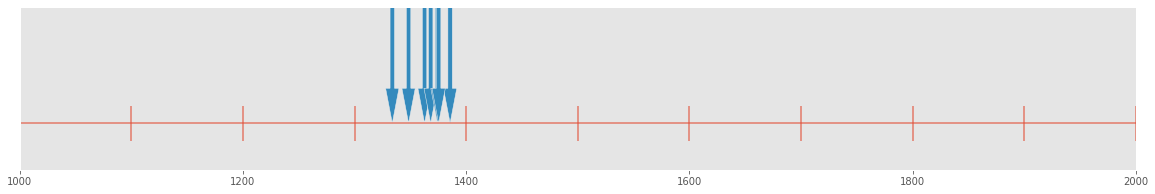

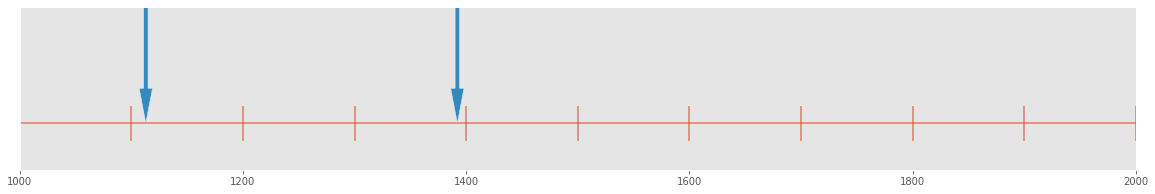

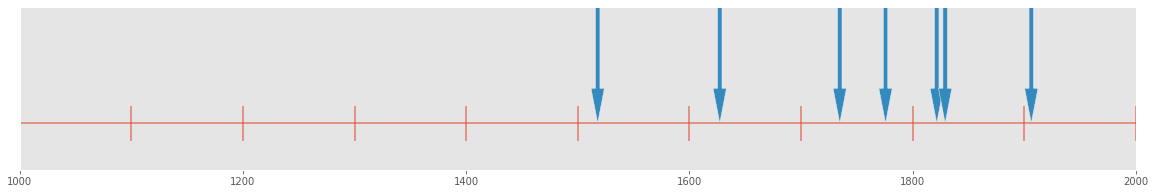

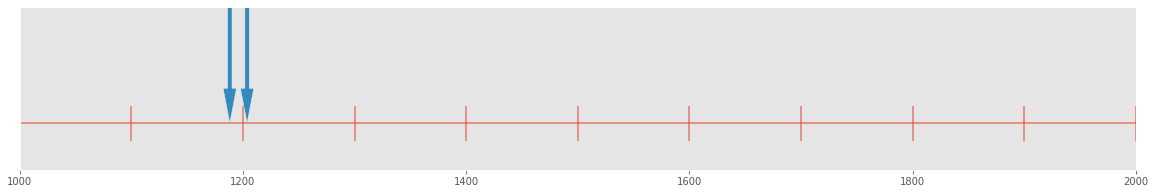

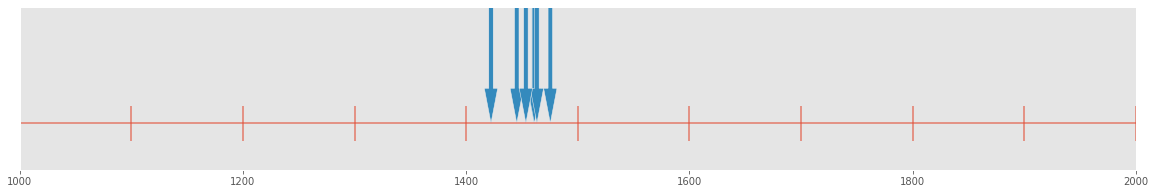

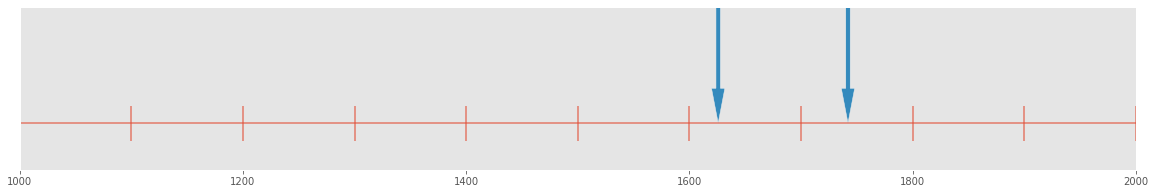

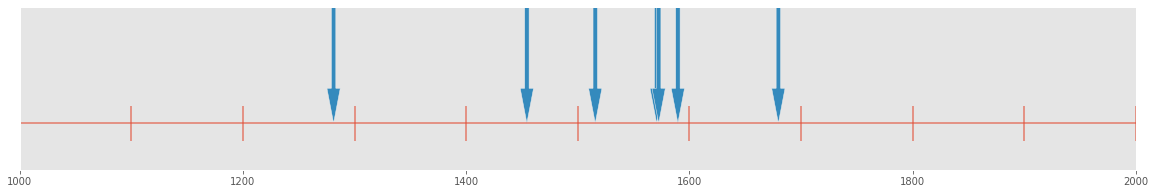

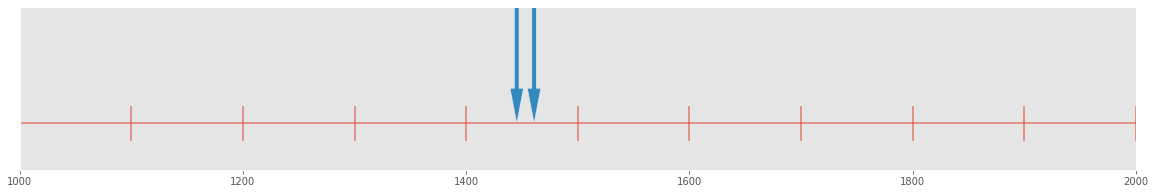

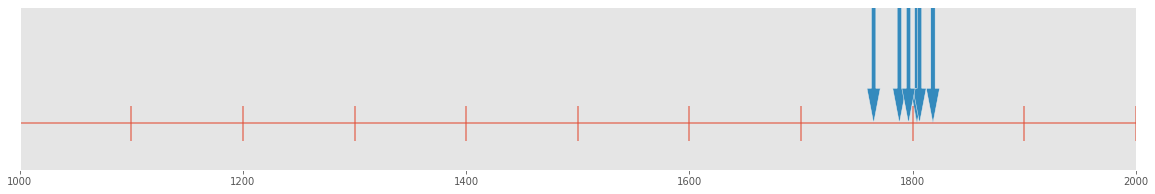

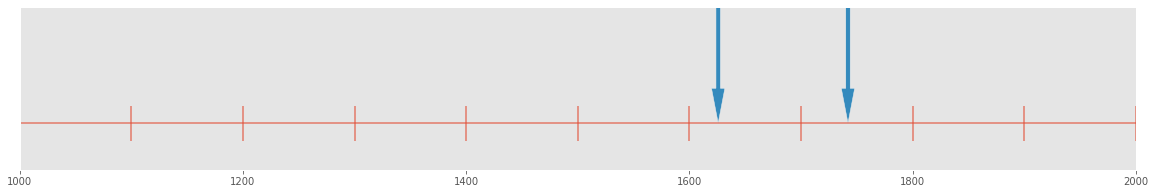

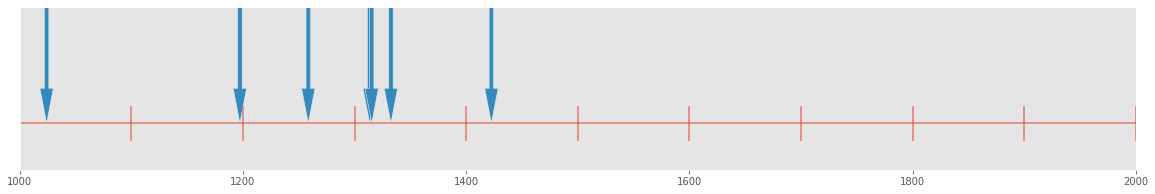

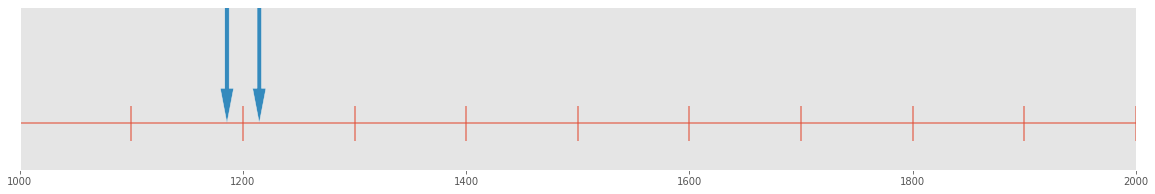

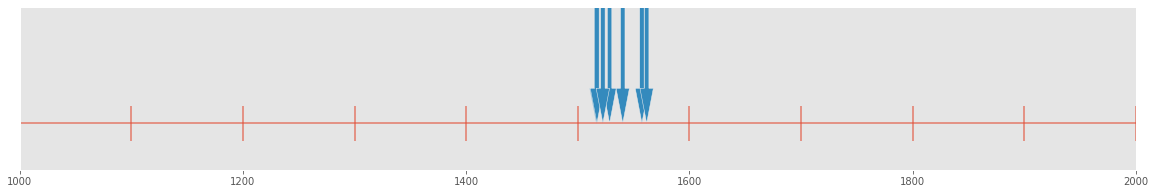

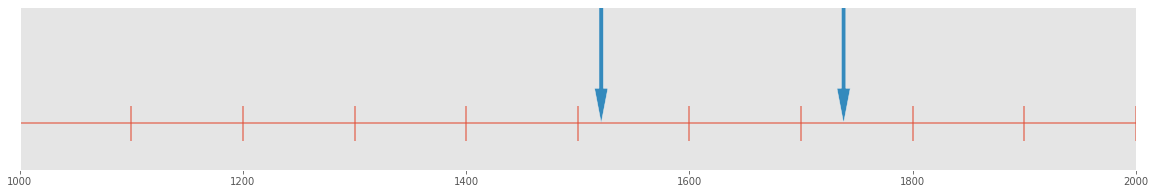

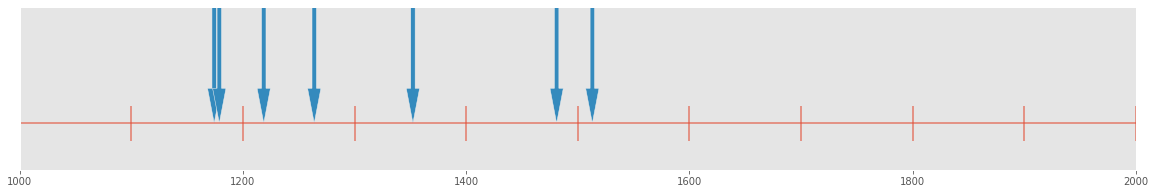

In [3]:
res = create_stimuli_experiment(start_mean = 1200,end_mean = 1800,list_std = [20,150],list_npoints = [2,7],n_iteration_per_condition = 2,n_samples = 10,mean_factor = 1,seed = 0,xmin = 1000,xmax = 2000,ymin = 800,ymax = 1500)


### This can be ignored

In [ ]:
"""possible_means = list(range(1750))
possible_means = possible_means[1250:]
mean = np.random.choice(possible_means,1)
small_std = 10
big_std = 150

sample_small_std = np.random.normal(loc=mean[0], scale=small_std, size=10000)
sample_big_std = np.random.normal(loc=mean[0], scale=big_std, size=10000)

print(f"The mean of the distribution is {mean[0]}")

figure, axis = plt.subplots(1,2)
axis[0].hist(sample_small_std,bins = 100,color='blue')
axis[0].set_xlim(1000,2000)
axis[1].hist(sample_big_std,bins = 100)
axis[1].set_xlim(1000,2000)
plt.show()"""

'       \n# # TODO pour chaque sample: create folder with adequate name, and save the 8 fig in the folder\n\nfor sample in range(n_samples):\n    data_dir = os.path.join(os.getcwd(),f"sample_{sample+1}")\n    try: os.mkdir(data_dir)\n\n    except FileExistsError:\n        pass\n\n    for iteration in range(n_iteration_per_condition):\n\n        for i_figure in range(len(final_result[:,iteration,sample])):\n            figure = final_result[i_figure,iteration,sample]\n            condition = dict_conditions[i_figure]\n            figure.savefig(fname = f"{data_dir}\\{condition}_iteration{iteration+1}_sample{sample}.png",bbox_inches = "tight",pad_inches = 0,transparent = True)\n\n\n'

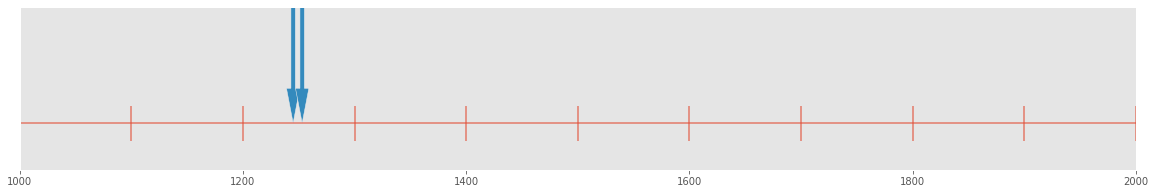

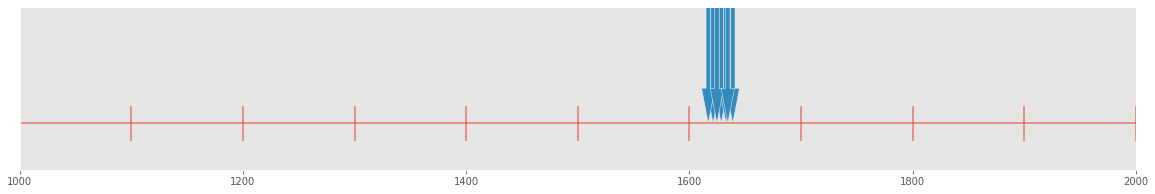

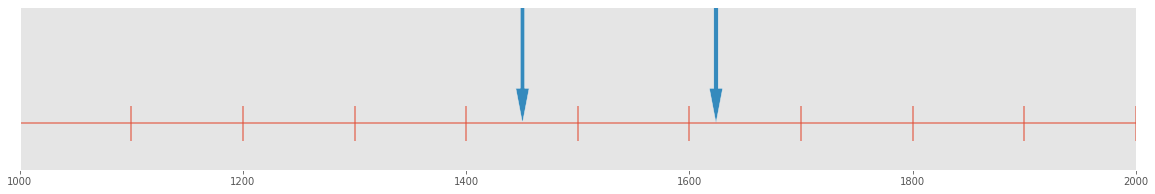

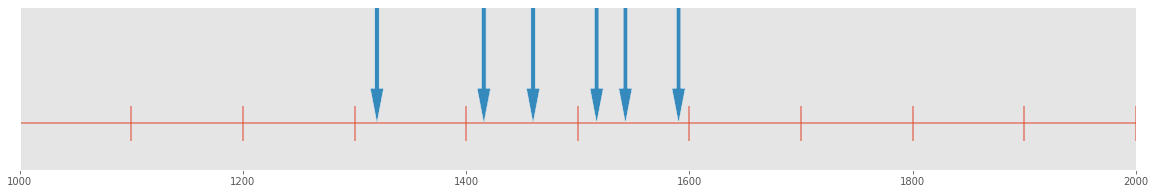

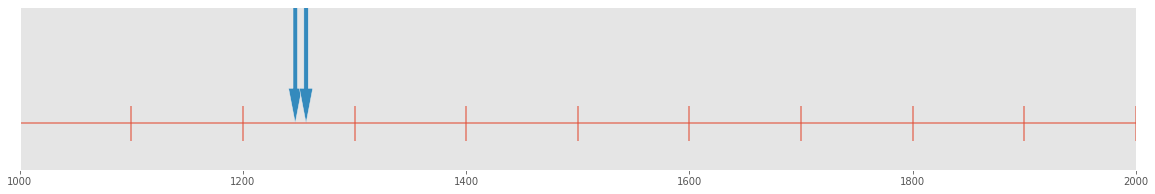

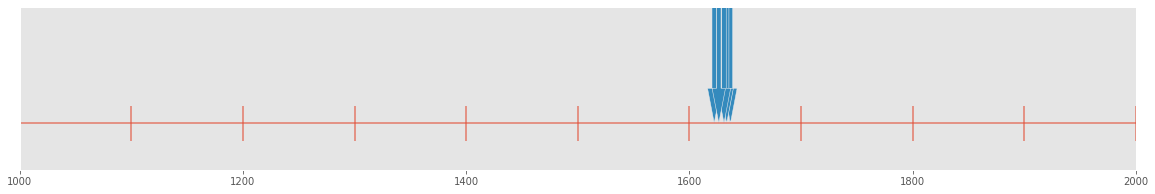

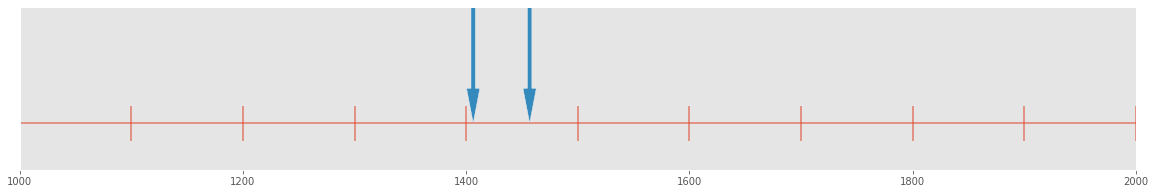

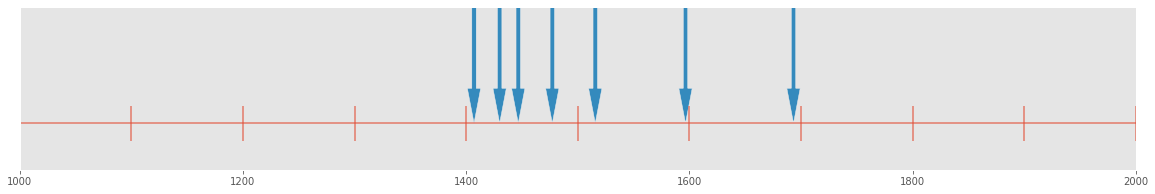

In [18]:
start_mean = 1250
end_mean = 1775
list_std = [10,100]
list_npoints = [2,7]
n_iteration_per_condition = 2
n_conditions = (len(list_std) * len(list_npoints)) * n_iteration_per_condition
list_mean = list(np.linspace(start_mean,end_mean,n_conditions))
n_samples = 1
mean_factor = 1
seed = np.random.seed(50)

#Parameters
small_std = 10
big_std = 100

small_size_sample = 2
big_size_sample = 7
seed = 51

    #Plotting 
xmin = 1000
xmax = 2000

ymin = 800
ymax = 1500
x_line = list(range(xmin,xmax+200,100))
y_line = [1000] * len(x_line)


dict_conditions = {0: "convergent_small_", 1:"convergent_large",2:"nonconvergent_small",3:"nonconvergent_large"}


list_of_means = create_pairings(list_mean,list_std,list_npoints,n_iteration_per_condition)
fig_list = np.empty((4,n_iteration_per_condition),dtype="object")
final_result = np.empty(shape = (4,n_iteration_per_condition,n_samples),dtype="object")

for sample in range(n_samples):
    for iteration in range(n_iteration_per_condition):     
        
        fig_list[0,iteration] = create_one_plot_from_scratch(mean=list_of_means[0][0],std=small_std,size_sample=small_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
        fig_list[1,iteration] = create_one_plot_from_scratch(mean=list_of_means[0][1],std=small_std,size_sample=big_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
        fig_list[2,iteration] = create_one_plot_from_scratch(mean=list_of_means[0][2],std=big_std,size_sample=small_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
        fig_list[3,iteration] = create_one_plot_from_scratch(mean=list_of_means[0][3],std=big_std,size_sample=big_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
    
        # final_result[:,iteration,sample] = fig_list[:,iteration]
"""       
# # TODO pour chaque sample: create folder with adequate name, and save the 8 fig in the folder

for sample in range(n_samples):
    data_dir = os.path.join(os.getcwd(),f"sample_{sample+1}")
    try: os.mkdir(data_dir)

    except FileExistsError:
        pass

    for iteration in range(n_iteration_per_condition):

        for i_figure in range(len(final_result[:,iteration,sample])):
            figure = final_result[i_figure,iteration,sample]
            condition = dict_conditions[i_figure]
            figure.savefig(fname = f"{data_dir}\\{condition}_iteration{iteration+1}_sample{sample}.png",bbox_inches = "tight",pad_inches = 0,transparent = True)


"""